In [26]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev as cheby_poly

In [31]:
def cheby_interp(f, n):
    '''Compute the coefficients of the degree-n Chebyshev
    interpolation of f at the extremizers y_k = cos(k*pi/n).
    
    Algorithm 9.1 in Volume 2'''

    y = np.cos((np.pi * np.arange(2*n)) / n)
    samples = f(y)

    coeffs = np.real(fft(samples))[:n+1] / n
    coeffs[0] /= 2
    coeffs[n] /= 2

    return coeffs

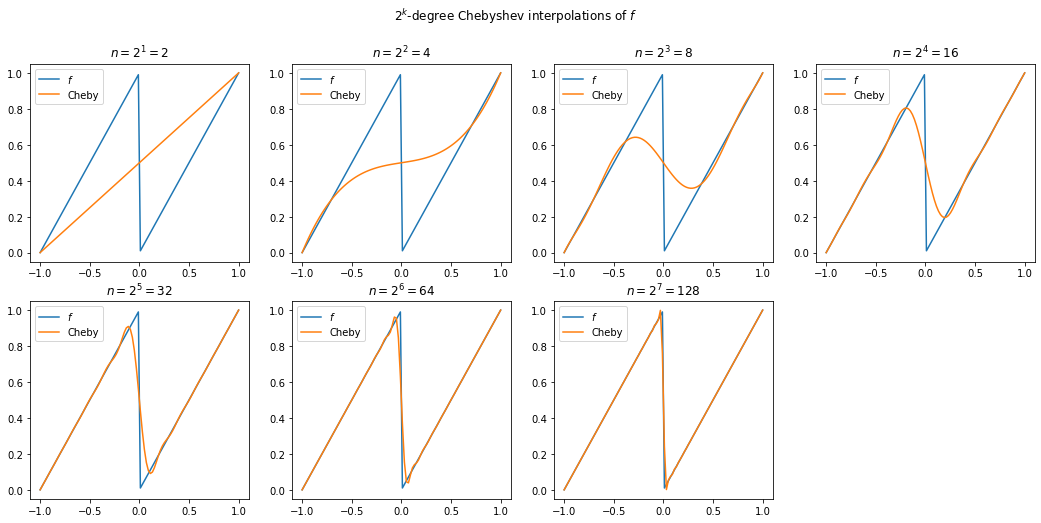

In [44]:
# Define f
f = np.vectorize(lambda t: 1+t if t < 0 else t)

# Get subplots
fig, axs = plt.subplots(2, 4, figsize=(18,8))
axs = axs.flatten()

# Define domain
a, b, num_pts = -1, 1, 100
domain = np.linspace(-1, 1, num_pts)

for ax, k in zip(axs, range(1, 7+1)):
    # Plot f
    ax.plot(domain, f(domain), label='$f$')

    # Plot (2**k)-degree Chebyshev interpolation
    ax.plot(domain, cheby_poly(cheby_interp(f, 2**k), domain=(a,b))(domain), label='Cheby')

    # Legend, title
    ax.legend()
    ax.set_title(f'$n = 2^{k} = {2**k}$')

# Remove last ax, show
axs[-1].remove()
plt.suptitle('$2^k$-degree Chebyshev interpolations of $f$')
plt.show()
